# Intro

# Importing Data
# start with importing messy data set but then use metal stuff for the rest of the teaching example

In [3]:
import requests

# URL locations of data
master_death_metal_bands = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/bands.csv"
master_metal_bands = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/metal_bands_2017.csv"
master_world_pop = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/world_population_1960_2015.csv"

# Grab the metal bands data
req = requests.get(master_death_metal_bands)
death_metal_bands_data = req.text

# Grab the metal bands data
req = requests.get(master_metal_bands)
metal_bands_data = req.text

# Grab the world population data
req = requests.get(master_world_pop)
world_pop_data = req.text

In [5]:
import pandas as pd

## A Realistic Depiction of Getting Data into Python

Exciting! We have some fresh new cyclic voltammetry data to analyze. Fortuitously, `pandas` has a function called `read_csv` design for loading tabular data. Let's do it!

In [15]:
pd.read_csv("cyclic_voltammetry_output.txt")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2


Ahhh! Our loading failed terribly! Let's take a look at our file to see what might be amiss.

It looks like our data doesn't actually start until line 81, as indicated by "Nb header lines: 81" on the second line. May have been wise to look at our file first, but eh, lesson learned.

Ok, now we need to turn to the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for help. Like a good programmer, I'll google it to find the key word arguments that we can use to modify `read_csv`.

... google "how to skip lines in pd read csv" ...

Aha! The keyword `skiprows` appears to be what we are looking for. It's description states "Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file." There are 81 lines, but the line numbers to skip are 0-indexed, which means that we will want `skiprows` to have a value of 80. Let's give it a try!

In [22]:
pd.read_csv("cyclic_voltammetry_output.txt", skiprows=80)

,mode\tox/red\terror\tcontrol changes\tNs changes\tcounter inc.\tNs\ttime/s\tcontrol/V/mA\tEwe/V\tdq/mA.h\tEce/V\tP/W\t<I>/mA\tEwe-Ece/V\tx\t(Q-Qo)/mA.h\tCapacity/mA.h
0,3\t1\t0\t0\t0\t0\t0\t0.0002\t0\t3.13411832\t0\...
1,3\t1\t0\t0\t0\t0\t0\t60.0002\t0\t3.13436651\t0...
2,3\t1\t0\t0\t0\t0\t0\t120.0002\t0\t3.13472915\t...
3,3\t1\t0\t0\t0\t0\t0\t180.0002\t0\t3.13482451\t...
4,3\t1\t0\t0\t0\t0\t0\t240.0002\t0\t3.13497734\t...
...,...
23215,1\t0\t0\t0\t0\t0\t1\t417662.4821\t-0.01425\t2....
23216,1\t0\t0\t0\t0\t0\t1\t417699.5241\t-0.01425\t2....
23217,1\t0\t0\t0\t0\t0\t1\t417733.6881\t-0.01425\t2....
23218,1\t0\t0\t0\t0\t0\t1\t417733.6951\t-0.01425\t2....


The columns aren't separated and we have `\t` characters all over the place, but still, progress! The `\t` characters are the separators in our data file, meaning our file is `tab`-seperated. Even though `csv` stands for Comma Seperated Values, other seperator characters are also common.

... google "how to specify separator in pd" ...

Looks like we can specify the type of separator by including the `sep` keyword. Let's do it!

In [6]:
pd.read_csv("cyclic_voltammetry_output.txt", skiprows=80, sep='\t')

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V/mA,Ewe/V,dq/mA.h,Ece/V,P/W,<I>/mA,Ewe-Ece/V,x,(Q-Qo)/mA.h,Capacity/mA.h
0,3,1,0,0,0,0,0,0.0002,0.00000,3.134118,0.000000e+00,-0.002699,0.000000,0.000000,3.136817,0.000000,0.000000,0.000000
1,3,1,0,0,0,0,0,60.0002,0.00000,3.134367,0.000000e+00,-0.002604,0.000000,0.000000,3.136970,0.000000,0.000000,0.000000
2,3,1,0,0,0,0,0,120.0002,0.00000,3.134729,0.000000e+00,-0.002527,0.000000,0.000000,3.137256,0.000000,0.000000,0.000000
3,3,1,0,0,0,0,0,180.0002,0.00000,3.134825,0.000000e+00,-0.002527,0.000000,0.000000,3.137352,0.000000,0.000000,0.000000
4,3,1,0,0,0,0,0,240.0002,0.00000,3.134977,0.000000e+00,-0.002355,0.000000,0.000000,3.137333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23215,1,0,0,0,0,0,1,417662.4821,-0.01425,2.021435,-1.447666e-04,0.016924,0.000029,-0.014246,2.004511,1.917172,-0.328737,0.135839
23216,1,0,0,0,0,0,1,417699.5241,-0.01425,2.020919,-1.465844e-04,0.016771,0.000029,-0.014246,2.004148,1.918027,-0.328884,0.135986
23217,1,0,0,0,0,0,1,417733.6881,-0.01425,2.020404,-1.351955e-04,0.016962,0.000029,-0.014246,2.003442,1.918815,-0.329019,0.136121
23218,1,0,0,0,0,0,1,417733.6951,-0.01425,2.020938,-2.770032e-08,0.016790,0.000029,-0.014246,2.004148,1.918815,-0.329019,0.136121


Yay! We've successfully imported our DataFrame. Sometimes it just takes a little tinkering. We are going to move on to a nicer dataset for the rest of the workshop but hopefully this has given you a realistic view of how to troubleshoot your imports!

In the next cell, we will import our data directly from a file hosted on GitHub. This is no harder than loading a `.csv` file on our local computer. We'll use this sick death metal data going forward.

In [ ]:
# Make a data frame
metal_bands_df = pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/metal_bands_2017.csv")
world_pop_df = pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/world_population_1960_2015.csv")

# Creating Columns

# Column Operations


*   Removing empty cells
*   Accessing specific columns/cells
*   Applying functions (non-statistical) to a column
*   Creating a new column based on data from other columns
*   Re-ordering data? Visualizing data? 



# Summation Statistics

# Exporting Data

# Nugent's Data

In [ ]:
import pandas as pd

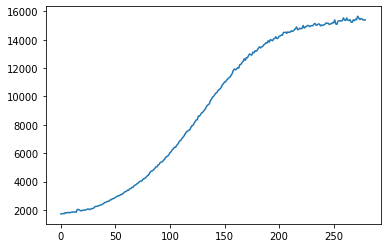

In [ ]:
spots_cropped_df = pd.read_csv('/content/DATA_PC1_TL10s_cropped_488.csv')
spots_cropped_df['Mean'].plot()

# Info on Nugent's Data Set

Nugent Lew's data:

OK so the single molecule data is fluorescent images of labeled proteins on a supported lipid bilayer at low enough densities that you can resolve (what you hope are) spots corresponding to individual proteins. We use a software package called TrackMate which detects the spots, calculates their location based on some approximation of a point spread function, and then attempts to create "tracks" between spots in consecutive frames so that you can see how the molecules are moving in close-to-real time. The data in the file All_spots_statistics.csv is not meaningful in terms of tracking because I didn't take them with high enough time resolution, but it still contains the detections of single molecules in each of 280 frames (indexed from 0, so the count goes up to 279). I also attached a video showing the images that have had spot detection applied. Each bright dot encircled by a purple circle is a spot that was counted by the program.

The .csv that comes out of this includes the x,y location of each individual spot (z position isn't relevant because the data is in a single plane), the frame (out of 0-279) in which it was detected (this is also a proxy for time, but I didn't scale it by the time interval), some stuff I don't really think about yet (quality, radius, visibility, manual_color), some image information (max, min, mean intensity, Std dev), a diameter estimate, contrast (idk what exactly this refers to) and the SNR (also not sure how this is computed).

Finally, a much simpler file is DATA_PC1_TL10s_cropped_488.csv which is simply the mean fluorescent intensity in each of 280 frames (this one indexes from 1 lol).

1. What is SNR?
2. This video doesn't have any purple circles I think? Or is the slight purple tint on some dots the thing you are referring to? A lot of the background also seems to have a purple tint.
3. What is the significance of having 280 images? Are you trying to see how much the protein blobs move around?

1. Signal to noise ratio
2. The circles are unfortunately thin and idk how to change that rn. You need to blow up the video window as large as you can, and pause to really see them. Not hugely important tho. Just to illustrate what the data is supposed to represent.
3. It's sorta arbitrary. It's the chosen experimental length such that I can record an entire enzymatic activation assay. The two datasets actually come from the same experiment, and if you plot out the mean intensity vs frames (ie time) from  DATA_PC1_TL10s_cropped_488.csv you can see that it forms a sigmoid. The experiment just has to be long enough to catch all that, and then also have the information about the number of blobs at each time point.

1. What are you hoping to learn from this dataset? Is the amount that the blobs move interesting in some way?
2. What is your current method of using / understanding this data? Are you looking for the sigmoid with TrackMate, Excel, etc?
3. Would we be allowed to share this data with workshop participants, or should we only use it as an example (not distributing the data)?

For me, all I want is the number of blobs in each frame and the mean intensity in the other data file. What I should be able to get is a rate of reaction (how quickly the reaction signified by the sigmoidal data happens) normalized by the number of blobs in each matching frame between the two data sets. ie. for each time point, what is the rate of reaction divided by the number of blobs. Theoretically that should match some biochemical kinetic model and I can fit some observed constants, but I haven't worked that part out yet.

Currently I am using ImageJ and TrackMate to output the raw data (the files I've sent are those), and the further analyzing and visualizing them in Python. I can actually share what I have so far if it'll help understand what I'm getting at in terms of the data analysis.

Please only use the data as an example.